In [1]:
# These are helpful routines that will assist in building this book.
# You should run this block before anything else. There is no output expected.
from astrodynamicsbook.bookhelpers import *

loadLatexPreamble()

# This is only here to create the navigation link:
genPrevLink()

$
\def\bs{\boldsymbol}
\def\mf{\mathbf}
\def\mb{\mathbb}
\def\mc{\mathcal}
\def\rfr{\mathcal}
\def\grad{{\rm grad}}
\def\Re{{\rm Re}}
\def\Im{{\rm Im}}
\def\und{\underline}
\def\ovl{\overline}
\def\unb{\underbrace}
\def\Log{\mbox{Log}}
\def\bfomega{\bs \omega}
\def\bfalpha{\bs \alpha}
\def\da{\triangleq}
\newcommand{\leftexp}[2]{{\vphantom{#2}}^{#1}\!{#2}}
\newcommand{\leftsub}[2]{{\vphantom{#2}}_{#1}\!{#2}}
\newcommand{\omegarot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\omega}}^{\mathcal{#2}}}}
\newcommand{\alpharot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\alpha}}^{\mathcal{#2}}}}
\newcommand{\framerot}[2]{{\leftexp{\mathcal{#1}}{C}^{\mathcal{#2}}}}
\newcommand{\dframerot}[2]{{\vphantom{\dot{C}}^{\mathcal{#1}}\!{\dot{C}^{\mathcal{#2}}}}}
\newcommand{\bdot}[1]{\dot{\mathbf{#1}}}
\newcommand{\bhat}[1]{\hat{\mathbf{#1}}}
\newcommand{\mbhat}[1]{\hat{\mathbb{#1}}}
\def\iwb{\omegarot{I}{B}}
\def\iab{\alpharot{I}{B}}
\def\icb{\framerot{I}{B}}
\def\dif{\mathop{}\!\mathrm{d}}
\newcommand{\intd}[1]{\dif#1}
\newcommand{\od}[3][]{{ \frac{\dif{^{#1}}#2}{\dif{#3^{#1}}} }}			
\newcommand{\pd}[3][]{{ \frac{\partial{^{#1}}#2}{\partial{#3^{#1}}} }}	 
\newcommand{\md}[6]{{  \frac{\partial{^{#2}}#1}{\partial{#3^{#4}}\partial{#5^{#6}}} }}
\newcommand{\fddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{#1}}{\dif{t}}}  }}
\newcommand{\fdddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{^{2}#1}}{\dif{t^2}}}  }}
\newcommand{\ddt}[1][]{\fddt[#1]{I}}
$


# [Previous](<18-Orbits in 3D.ipynb>)

# Direct Propagation of Orbital State Vectors

Having [firmly established](<18-Orbits in 3D.ipynb#Conversion-Between-Orbital-Elements-and-Orbital-State-Vectors>) the equivalence of the orbital state vectors and Keplerian orbital elements, we can now ask whether it is possible to propagate the orbital state vectors directly, without having to resort to conversion to the Keplerian elements.  We do so by positing that we can express the orbital radius vector at a time $t + \Delta t$ as a linear combination of the orbital state vectors at time $t$:
$$ \mf r(t + \Delta t) = f \mf r(t) + g \mf v(t)$$
where $f$ and $g$ are scalar functions of $t, \Delta{t}$ and potentially of $\mf r(t), \mf v(t), \mf r(t+\Delta t), \mf v(t+ \Delta t)$.

<div class="alert alert-block alert-danger">
    We're obviously going to prove that this works, but before we get to there, it's kind of annoying for someone to say 'we will posit' and then magically pull the answer out of seemingly nowhere.  The fact that it's provable doesn't make it less annoying. Let's try to remove this annoyance before proceeding. 
</div>

So why would anyone have any expectation of this working?  Well, we know that both $\mf r$ and $\mf v$ at any point in the past or future will lie in the exact same plane (the perifocal plane) as $\mf r$ and $\mf v$ at an arbitrary time $t$.  Thus, so long as the orbital state vectors [span](<"01-Introduction.ipynb#Vector-Space-Basis-and-Reference-Frames">) the perifocal plane, then our assertion must be correct.  A pair of vectors span a plane if they are linearly independent, or, equivalently, non-parallel.  So, is it true that the orbital radius and orbital velocity vectors are nowhere parallel?

Recalling the [component form](<13-The Perifocal Frame.ipynb#The-Perifocal-Frame>) of the state vectors:

$$\begin{split} \mf r &\propto \cos(\nu) \bhat{e} + \sin(\nu) \bhat{q}\\
\mf v &\propto -\sin(\nu) \bhat{e} + (e + \cos(\nu)) \bhat{q}\end{split}$$

we see that in order for these two vectors to be parallel, we would simultaneously need $\cos(\nu) \propto \sin(\nu)$ and $\sin(\nu) \propto e+\cos(\nu)$. As $\sin$ and $\cos$ are orthogonal functions, and $e$ is a strictly positive real number, no combination of $e$ and $\nu$ can exist to satisfy these two proportionalities.  $\mf r$ and $\mf v$ can never point in the same (or exactly opposite) directions! 

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Or can they?  (No, no they can't.  But convince yourself.)
</div>

# f and g Functions

So, we're totally safe in asserting that there exist some scalars $f$ and $g$ via which we can map the current orbital state vectors to some future (or past) orbital radius vector.  To make things a bit notationally simpler, and clearly describe what we're doing here, let's define:
$$ \mf r_0 \equiv \mf r(t_0) \,,\quad \mf r \equiv \mf r(t_0+\Delta t) \,,\quad  \mf v_0 \equiv \mf v(t_0) \,,\quad \mf v \equiv \mf v(t_0+\Delta t)$$
where $\Delta t$ is any positive or negative change in time.  We'll also take $\nu_0$ to be the true anomaly at time $t_0$ and $\nu$ to be the true anomaly at $t_0 + \Delta{t}$, and $r, r_0$ to be the magnitudes of $\mf r$ and $\mf r_0$, respectively. Returning to our initial assertion, we thus have:
$$\mf r = f\mf r_0 + g \mf v_0$$

Now, how about $\mf v$? The key point here is that we are treating $\mf r_0, \mf v_0$ as basis vectors for the perifocal plane, meaning that they are constants.  As such, when we differentiate $\mf r$ to get $\mf v$, we only need to consider the scalar derivatives of $f$ and $g$:

$$\mf v = \dot f\mf r_0 + \dot g \mf v_0$$

<div class="alert alert-block alert-danger">
This likely seems hugely counterintuitive, as we have worked long and hard to figure out the derivatives of the orbital radius and velocity vectors, but it's all a matter of definitions.  In this case, $\mf r_0$ and $\mf v_0$ do not represent time-varying quantities.  Rather, they are a constant, inertially-fixed basis, and thus have zero inertial derivatives.  Hold on to your skepticism, though - we'll be sure to come back at the end of this and validate that everything holds together.
    </div>

Remember that $\mf h = \mf r \times \mf v$ is a constant of motion, and so we can write:
$$ \mf r_0 \times \mf v_0 = \mf r \times \mf v  = \left(f\mf r_0 + g \mf v_0\right) \times \left(\dot f\mf r_0 + \dot g \mf v_0\right)$$

Distributing out the cross products on the right-hand side of the expression, we find:
$$\mf r_0 \times \mf v_0 = f\dot g \left(\mf r_0 \times  \mf v_0\right) + g \dot f\underbrace{\left(\mf v_0 \times  \mf r_0)\right)}_{\displaystyle \equiv -\mf r_0 \times  \mf v_0} \quad\Longrightarrow\quad f\dot g - \dot f g = 1$$

That is, the $f$ and $g$ functions and their derivatives are not independent, but must obey this constraint equation.

To find the actual values of these terms, note that we can isolate $f$ and $g$ by crossing $\mf r$ with $\mf v_0$ and $\mf r_0$, respectively. That is:
$$\mf r \times \mf v_0 = \left(f\mf r_0 + g \mf v_0\right)\times \mf v_0 = f\left(\mf r_0 \times \mf v_0\right) \quad \Longrightarrow \quad \Vert \mf r \times \mf v_0\Vert = fh$$


Let's try it out:

In [2]:
r0, r, mu, h, e, l = symbols("r_0,r,mu,h,e,ell", real=True, positive=True)
nu0, nu = symbols("nu_0,nu", real=True)
# generate perifocal frame components of all initial and final orbital states
r0vec = r0 * Matrix([cos(nu0), sin(nu0), 0])
rvec = r * Matrix([cos(nu), sin(nu), 0])
v0vec = mu / h * Matrix([-sin(nu0), e + cos(nu0), 0])
vvec = mu / h * Matrix([-sin(nu), e + cos(nu), 0])
fhvec = rvec.cross(v0vec)
fhvec

⎡                      0                      ⎤
⎢                                             ⎥
⎢                      0                      ⎥
⎢                                             ⎥
⎢μ⋅r⋅(e + cos(ν₀))⋅cos(ν)   μ⋅r⋅sin(ν)⋅sin(ν₀)⎥
⎢──────────────────────── + ──────────────────⎥
⎣           h                       h         ⎦

As expected, $\mf r_1 \times \mf v_0$ is entirely in the $\bhat{h}$ direction.  We can now solve for $f$ as:

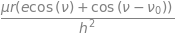

In [3]:
fexp = simplify(fhvec[2] / h)
fexp

We can simplify this even further by recalling that $\ell = \dfrac{h^2}{\mu}$ and that $r = \dfrac{\ell}{1 + e\cos(\nu)}$

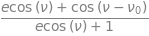

In [4]:
fexp = simplify(fexp.subs(mu / h**2, 1 / l).subs(r, l / (1 + e * cos(nu))))
fexp

Noting that $\cos$ is an even function (meaning we can swap the order of the subtraction in any cosine argument),  we can split this expression as:
$$f = \frac{e\cos(\nu)}{1+ e\cos(\nu)} + \frac{\cos(\Delta\nu)}{1+ e\cos(\nu)}$$
where $\Delta\nu \triangleq \nu - \nu_0$.  As:
$$\frac{1}{1+ e\cos(\nu)}  \equiv \frac{r}{\ell} $$
the first term on the right-hand side can be re-written as:
$$\frac{e\cos(\nu_1)}{1+ e\cos(\nu_1)} = \frac{\ell - r}{\ell}$$
and thus, the whole $f$ expression becomes:
$$f = \frac{\ell - r}{\ell} + \frac{r}{\ell}\cos(\Delta\nu) = 1 - \frac{r}{\ell}\left(1 - \cos(\Delta\nu)\right) $$

Neat!  Now let's try for $g$:
$$\mf r_0 \times \mf r = \mf r_0 \times \left(f\mf r_0 + g \mf v_0\right) = g\mf h$$

In [5]:
gexp = simplify(r0vec.cross(rvec)[2] / h)
gexp

Sine is an odd function, and so flipping the order of subtraction in the argument flips the total sign of the expression, meaning that:
$$g = \frac{r_{0} r \sin{\left(\Delta\nu\right)}}{\sqrt{\mu \ell}}$$
where we've also substituted $h = \sqrt{\mu \ell}$.

We now repeat the exact same steps to get $\dot f$ and $\dot g$ by crossing $\mf v_1$ with $\mf v_0$ and $\mf r_0$:

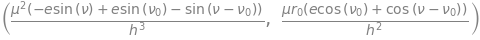

In [6]:
fdotexp = simplify((vvec.cross(v0vec))[2] / h)
gdotexp = simplify(r0vec.cross(vvec)[2] / h)
fdotexp, gdotexp

At this point, let's make sure that everything is holding together properly.   First, lets see if our constraint equation holds:

In [7]:
simplify(
    (fexp * gdotexp - gexp * fdotexp)
    .subs(r0, h**2 / mu / (1 + e * cos(nu0)))
    .subs(r, h**2 / mu / (1 + e * cos(nu)))
)

Next, we can directly differentiate our $f$ and $g$ expressions and see if they match what we just found for $\dot f$ and $\dot g$.  The only caveat here is that we have to still be careful about what we treat as a time-varying quantity.  Just as $\mf r_0$ and $\mf v_0$ are constant in the scope of the $f$ and $g$ expression, so too is $\nu_0$.  Only $\nu$ should be considered to be time-variable here.  With this in mind, let's see how everything works out:

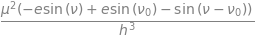

In [8]:
nud, t = symbols("nudot, t", real=True)
diffmap = {nu: nud}
nudexp = h / (h**2 / mu / (1 + e * cos(nu))) ** 2
fdotexp_check = simplify(difftotal(fexp, t, diffmap).subs(nud, nudexp))
fdotexp_check

Awesome! They match!  You see it, right:

In [9]:
fdotexp - fdotexp_check

And ditto for the $g$ and $\dot g$ expressions:

In [10]:
gdotexp_check = simplify(
    difftotal(gexp.subs(r, h**2 / mu / (1 + e * cos(nu))), t, diffmap).subs(
        nud, nudexp
    )
)
gdotexp - gdotexp_check

Let's summarize.  The derived $\dot g$ expression has the same basic form as the $f$ expression (except for having a lone $\cos(\nu_0)$ terms instead of $\cos(\nu))$, and so the exact same substitutions can be made.  For the $\dot f$ expression, we can perform a few additional substitutions (and once again take advantage of the [half-angle tangent relationships](<15-Keplers Time Equation.ipynb#half-angle-tan>)) to get it in more of a standard form (i.e., one matching forms found throughout the literature).  Summarizing, we have:

<div class="alert alert-block alert-info" id="f-and-g-nu">
    $$f = 1 - \frac{r}{\ell}\left(1 - \cos(\Delta\nu)\right) $$
    $$g = \frac{r_{0} r \sin{\left(\Delta\nu\right)}}{\sqrt{\mu \ell}}$$
    $$\dot f = \sqrt{\dfrac{\mu}{\ell}}\tan\left(\dfrac{\Delta \nu}{2}\right)\left(\dfrac{1 - \cos(\Delta\nu)}{\ell} - \dfrac{1}{r_0} - \dfrac{1}{r}\right) $$
    $$\dot g = 1 - \dfrac{r_0}{\ell}\left(1 - \cos(\Delta \nu)\right) $$
</div>

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Verify!
</div>

## f and g Functions in Eccentric and Hyperbolic Anomaly

We can also derive forms for $f$ and $g$ as functions functions of the eccentric anomaly:

In [11]:
# generate perifocal frame components of all initial and final orbital states
# as functions of eccentric anomaly
a = symbols("a", real=True, positive=True)
E, E0 = symbols("E, E_0", real=True)
r0vec = a * Matrix([cos(E0) - e, sqrt(1 - e**2) * sin(E0), 0])
rvec = a * Matrix([cos(E) - e, sqrt(1 - e**2) * sin(E), 0])
v0vec = (
    a**2 * sqrt(mu / a**3) / r0 * Matrix([-sin(E0), sqrt(1 - e**2) * cos(E0), 0])
)
vvec = a**2 * sqrt(mu / a**3) / r * Matrix([-sin(E), sqrt(1 - e**2) * cos(E), 0])
fhvec = rvec.cross(v0vec)
fexp2 = simplify(fhvec[2] / sqrt(mu * a * (1 - e**2)))  # h = sqrt(mu*a*(1-e**2))
fexp2

[Recalling](<15-Keplers Time Equation.ipynb#Kepler's-Time-Equation>) that $r = a(1 - e\cos(E))$, we have:
$$f = \frac{a\cos{\left(E - E_{0} \right)}}{r_{0}} + \underbrace{\frac{-ae\cos(E_0)}{r_0}}_{\displaystyle \equiv \frac{r_0 - a}{r_0}} = 1 - \frac{a}{r_0}\left(1 - \cos(\Delta{E})\right)$$
where $\Delta{E} \triangleq E - E_0$.

For $g$ we have:

In [12]:
gexp2 = simplify(r0vec.cross(rvec)[2] / sqrt(mu * a * (1 - e**2)))
gexp2

Recalling Kepler's time equation, $-e\sin(E) = n(t - t_p) - E$, and since $\sqrt{a^3/\mu} = n^{-1}$, we have:
$$ g = \frac{1}{n}\left(n(t-t_p) - E -n(t_0 - t_p) + E_0 + \sin(E - E_0)\right) = \Delta{t} - \frac{\Delta{E} - \sin(\Delta{E})}{n}$$

And the derivatives:

In [13]:
fdotexp2 = simplify((vvec.cross(v0vec))[2] / sqrt(mu * a * (1 - e**2)))
gdotexp2 = simplify(r0vec.cross(vvec)[2] / sqrt(mu * a * (1 - e**2)))
fdotexp2, gdotexp2

Another quick round of verifications:

In [14]:
simplify(
    (fexp2 * gdotexp2 - gexp2 * fdotexp2)
    .subs(r0, a * (1 - e * cos(E0)))
    .subs(r, a * (1 - e * cos(E)))
)

In [15]:
Ed = symbols("Edot", real=True)
diffmap = {E: Ed}
Edexp = sqrt(mu / a**3) / (1 - e * cos(E))
fdotexp2_check = simplify(difftotal(fexp2, t, diffmap).subs(Ed, Edexp))
simplify(fdotexp2_check - fdotexp2.subs(r, a * (1 - e * cos(E))))

In [16]:
gdotexp2_check = simplify(difftotal(gexp2, t, diffmap).subs(Ed, Edexp))
simplify(gdotexp2_check - gdotexp2.subs(r, a * (1 - e * cos(E))))

Fantastic!  To summarize:

<div class="alert alert-block alert-info" id="f-and-g-E">
    $$f = \frac{a}{r_0}\left(\cos(\Delta E) - 1\right) + 1$$
    $$g = \frac{1}{n} \left(\sin(\Delta E) - \Delta E\right) + \Delta t $$
    $$\dot f = -\dfrac{\sqrt{\mu a}}{rr_0}\sin(\Delta E) $$
    $$\dot g = \dfrac{a}{r}\left(\cos(\Delta E) - 1\right) + 1 $$
</div>

Recalling the strong correspondence between the eccentric and hyperbolic anomaly equations, we can write the $f$ and $g$ functions for hyperbolic anomaly by inspection as:

<div class="alert alert-block alert-info">
    $$f = \frac{a}{r_0}\left(\cosh(\Delta H) - 1\right) + 1$$
    $$g = \frac{1}{n_h} \left(\Delta H - \sinh(\Delta H) \right) + \Delta t $$
    $$\dot f = -\dfrac{\sqrt{-\mu a}}{rr_0}\sinh(\Delta H) $$
    $$\dot g = \dfrac{a}{r}\left(\cosh(\Delta H) - 1\right) + 1 $$
</div>

## f and g Functions in Parabolic Anomaly

Just to show off, let's see if we can knock out the parabolic versions.  Leveraging our [previous work](<17-Open Orbit Propagation.ipynb#Perifocal-Frame-Components-as-Functions-of-Parabolic-Anomaly>):

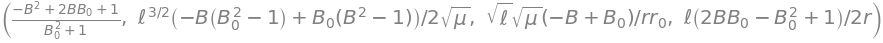

In [17]:
B, B0, Bd = symbols("B, B_0, Bdot", real=True)
r0vec = l * Matrix([(1 - B0**2) / 2, B0, 0])
rvec = l * Matrix([(1 - B**2) / 2, B, 0])
v0vec = sqrt(mu * l) / r0 * Matrix([-B0, 1, 0])
vvec = sqrt(mu * l) / r * Matrix([-B, 1, 0])
fhvec = rvec.cross(v0vec)
fexp3 = simplify(
    (fhvec[2] / sqrt(mu * l)).subs(r0, l / 2 * (1 + B0**2))
)  # h = sqrt(mu*l)
gexp3 = simplify(r0vec.cross(rvec)[2] / sqrt(mu * l))
fdotexp3 = simplify((vvec.cross(v0vec))[2] / sqrt(mu * l))
gdotexp3 = simplify(r0vec.cross(vvec)[2] / sqrt(mu * l))

fexp3, gexp3, fdotexp3, gdotexp3

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Verify that the constraint expression and direct integration of $f$ and $g$ all work out in the parabolic anomaly case.
</div>

In [18]:
# Exercise!

# The Kepler State Transition Matrix

More in the way of convenient bookkeeping rather than introducing a new concept, we note that the $f$ and $g$ expressions give us a linear transformation in the state vectors.  If we define the orbital state:
$$\mf z \triangleq \begin{bmatrix} \mf r \\ \mf v \end{bmatrix}$$
then we can write:
$$ \mf z(t + \Delta t) = \underbrace{\left.\begin{bmatrix} f & g \\ \dot f& \dot g \end{bmatrix}\right|_{(t, \Delta t)}}_{\displaystyle \triangleq \Phi(t,\Delta t) }\mf z(t)$$

where $\Phi$ is known as the **Kepler State Transition Matrix**. While very convenient from a notational standpoint, the utility of this form is fairly limited, as the matrix must be recomputed for every new value of $t$ and $\Delta t$, which requires solving for $\Delta \nu$ (or equivalently $\Delta E$ or the change in any of the other anomalies, as appropriate), meaning that we have to do all of the numerical iteration work we've previously explored. Nevertheless, there are certain situations where the formalism of $f$ and $g$ functions can be incredibly helpful, and we will be returning to them periodically in the future. 

In [19]:
# This is just here to generate the link to the next notebook
genNextLink()

# [Next](<20-Series Solutions for f and g.ipynb>)